In [53]:
import autosklearn.classification


In [1]:
from autosklearn.classification import AutoSklearnClassifier

from autosklearn.experimental.askl2 import AutoSklearn2Classifier

In [2]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Prediction of landsldies using auto-sklearn machine learning

In [4]:
os.chdir("/mnt/q/5m Training Data Rasters V2")

Loading landslide presence/absence points

In [5]:
data = pd.read_csv("/mnt/q/Training Data/TrainingData_50%roadsremoved_2_RF_FS.csv")


#data = pd.read_csv("/mnt/e/LSM - NGU metode/TrainingData_NGU_method.csv")

In [6]:
data.head()

#data.drop(columns=['d_roads','landuse'], inplace=True)

,Landslide,eastness,profile,northernes,spi,tri,twi,elevation,d_river,landforms,d_roads,losmasse,ndvi,a_perc,landuse,soil_con
0,0,0.501105,-11.345300,-0.865386,-1.249440,0.924816,7.47701,37.6218,148.6230,5,517.814,130,0.254263,1904.09,5,3
1,0,0.303129,0.804059,0.952949,-3.083090,0.030275,11.97080,38.8094,128.7100,5,169.992,130,0.343899,2037.47,10,7
2,0,-0.978111,-11.616400,-0.208084,2.620640,2.470670,9.08558,56.4684,121.9150,6,310.503,130,0.303695,2008.17,2,3
3,0,0.793612,-4.607510,-0.608424,-1.933110,0.580487,7.65612,31.5688,81.4413,5,513.673,130,0.352407,1994.25,10,7
4,0,-0.353161,-25.208400,-0.935562,0.196974,4.946400,5.50977,33.6191,627.6550,6,136.261,130,0.252834,2085.11,5,2


In [7]:
data.describe()

,Landslide,eastness,profile,northernes,spi,tri,twi,elevation,d_river,landforms,d_roads,losmasse,ndvi,a_perc,landuse,soil_con
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,0.500716,-0.059639,9.544104,-0.057280,-0.393516,5.833515,6.416734,238.229670,263.524617,5.005014,310.824865,85.455587,0.361355,2404.687487,3.287249,2.185530
std,0.500179,0.736205,100.525278,0.672218,4.183939,4.438203,2.064330,270.766236,322.365641,2.248212,507.794811,48.066026,0.110730,647.339231,2.338368,1.113279
min,0.000000,-0.999999,-430.919000,-0.999995,-11.529400,0.027144,0.700000,0.488276,0.000000,0.000000,0.000000,11.000000,-0.053911,667.208000,1.000000,1.000000
25%,0.000000,-0.805659,-40.008025,-0.694951,-1.158500,2.686495,5.036738,40.421525,62.806300,4.000000,19.224000,50.000000,0.308901,1936.772500,2.000000,1.000000
50%,1.000000,-0.130133,2.033375,-0.091841,0.550940,5.033710,5.952410,116.499000,156.888500,6.000000,87.878650,81.000000,0.383320,2376.840000,2.000000,2.000000
75%,1.000000,0.715418,48.983275,0.582779,2.025043,7.738580,7.267592,358.652000,354.136250,6.000000,397.533750,130.000000,0.431506,2795.002500,5.000000,3.000000
max,1.000000,0.999997,596.416000,1.000000,11.284900,53.601100,17.896800,1454.900000,5165.250000,10.000000,5032.320000,130.000000,0.569498,4622.830000,11.000000,7.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Landslide   1396 non-null   int64  
 1   eastness    1396 non-null   float64
 2   profile     1396 non-null   float64
 3   northernes  1396 non-null   float64
 4   spi         1396 non-null   float64
 5   tri         1396 non-null   float64
 6   twi         1396 non-null   float64
 7   elevation   1396 non-null   float64
 8   d_river     1396 non-null   float64
 9   landforms   1396 non-null   int64  
 10  d_roads     1396 non-null   float64
 11  losmasse    1396 non-null   int64  
 12  ndvi        1396 non-null   float64
 13  a_perc      1396 non-null   float64
 14  landuse     1396 non-null   int64  
 15  soil_con    1396 non-null   int64  
dtypes: float64(11), int64(5)
memory usage: 174.6 KB


In [9]:
data.isnull().sum()

Landslide     0
eastness      0
profile       0
northernes    0
spi           0
tri           0
twi           0
elevation     0
d_river       0
landforms     0
d_roads       0
losmasse      0
ndvi          0
a_perc        0
landuse       0
soil_con      0
dtype: int64

Import packages for machine learning

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

<AxesSubplot:>

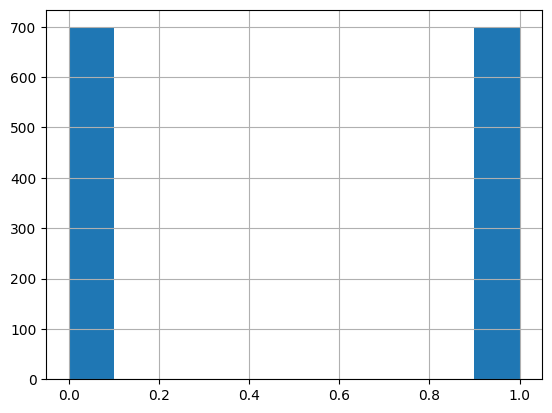

In [11]:
data["Landslide"].hist()

Identify numerical and catagorical clumns

In [12]:
num_cols = ['eastness', 'profile', 'northernes', 'spi', 'tri', 'twi', 'elevation', 'd_river','d_roads','ndvi','a_perc']
cat_cols = ['landforms', 'losmasse','landuse', 'soil_con']


data[num_cols] = data[num_cols].apply(pd.to_numeric)
data[cat_cols] = data[cat_cols].apply(pd.Categorical)

y = data.pop('Landslide')
X = data.copy()



"""num_cols = ['slope_degr', 'plan_curv', 'flow_acc']
cat_cols = []


data[num_cols] = data[num_cols].apply(pd.to_numeric)
data[cat_cols] = data[cat_cols].apply(pd.Categorical)

y = data.pop('Landslide')
X = data.copy()
"""

"num_cols = ['slope_degr', 'plan_curv', 'flow_acc']\ncat_cols = []\n\n\ndata[num_cols] = data[num_cols].apply(pd.to_numeric)\ndata[cat_cols] = data[cat_cols].apply(pd.Categorical)\n\ny = data.pop('Landslide')\nX = data.copy()\n"

In [13]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape

(977, 15)

In [15]:
X_test.shape

(419, 15)

In [16]:
# If model is already run and saved ...

from joblib import load

# Load the model from the file
cls_loaded = load('/mnt/q/AutoSklearn_Models/autosklearn_classifier_MLP_120min.joblib')

In [17]:
y_pred = cls_loaded.predict(X_train)

Build and fit a classifier

In [70]:
cls = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=240*60,
    per_run_time_limit=None,
    n_jobs=8
)
cls.fit(X_train, y_train, X_test, y_test)



"""cls = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=240*60,
    n_jobs=8,
    include={'classifier': ['mlp']},
)
cls.fit(X_train, y_train, X_test, y_test)
"""



[WARNING] [2024-05-08 19:09:40,699:Client-AutoML(1):c1203d36-0d5d-11ef-85c3-00155d2406c6] Capping the per_run_time_limit to 3599.0 to have time for a least 2 models in each process.


"cls = autosklearn.classification.AutoSklearnClassifier(\n    time_left_for_this_task=240*60,\n    n_jobs=8,\n    include={'classifier': ['mlp']},\n)\ncls.fit(X_train, y_train, X_test, y_test)\n"

# Classification report:

In [18]:
# First for the training

from sklearn.metrics import classification_report

print(classification_report(y_train,
                           cls_loaded.predict(X_train))) # cls_loaded if using the imported model

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       502
           1       0.91      0.95      0.93       475

    accuracy                           0.93       977
   macro avg       0.93      0.93      0.93       977
weighted avg       0.93      0.93      0.93       977



In [19]:
# Now we test the predictive eccuarcy on the test data:
print(classification_report(y_test,
                           cls_loaded.predict(X_test))) # cls_loaded if using the imported model

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       195
           1       0.89      0.88      0.89       224

    accuracy                           0.88       419
   macro avg       0.88      0.88      0.88       419
weighted avg       0.88      0.88      0.88       419



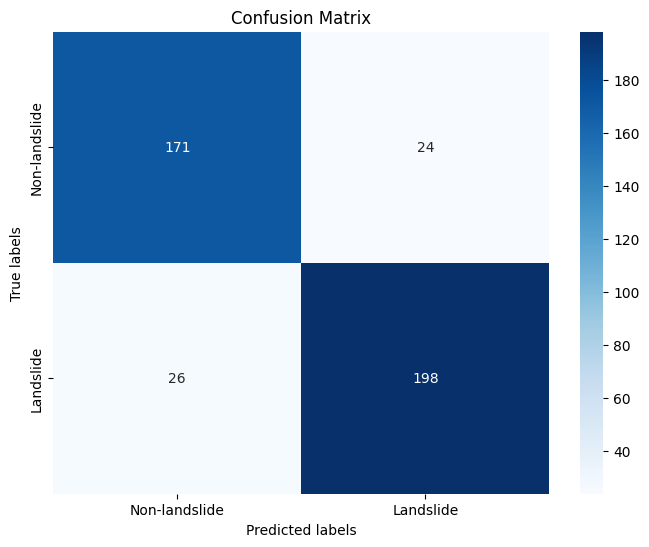

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = cls_loaded.predict(X_test) # cls_loaded if using the imported model
conf_matrix = confusion_matrix(y_test, y_pred)  # Ensure the order of y_test and y_pred

# Creating a heatmap
plt.figure(figsize=(8, 6))  # You can adjust the size of the figure
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-landslide', 'Landslide'],
            yticklabels=['Non-landslide', 'Landslide'])
plt.xlabel('Predicted labels')  # Label for x-axis
plt.ylabel('True labels')  # Label for y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.savefig('/mnt/q/Plots/Autosklearn_MLP_CM.png') 
plt.show()

In [21]:
from sklearn.metrics import accuracy_score

# Print the overall accuracy
print(accuracy_score(y_test, y_pred))

0.8806682577565632


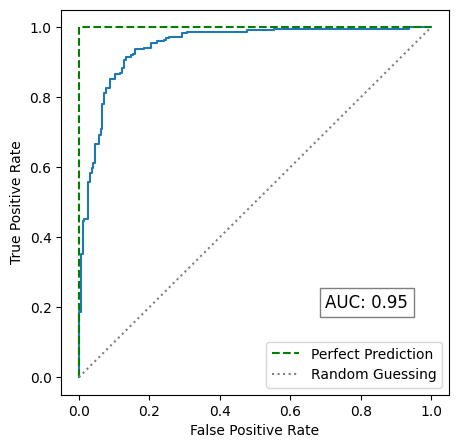

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

y_probs = cls_loaded.predict_proba(X_test)[:, 1]
positive_label = 1  # Define the positive class label; adjust according to your dataset
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=positive_label)
auc_score = roc_auc_score(y_test, y_probs)

fig, ax = plt.subplots(figsize=(5, 5))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=ax)

# Adding text for AUC score and additional lines for reference
plt.text(0.7, 0.2, f'AUC: {auc_score:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.plot([0, 0, 1], [0, 1, 1], color='green', linestyle='--', label='Perfect Prediction')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', label='Random Guessing')

plt.legend(loc='lower right')

# Save the plot to a file with the adjusted figure size
#plt.savefig('/mnt/q/Plots/Autosklearn_MLP_Roc.png')
plt.show()

In [23]:
print(cls.leaderboard()) # cls_loaded if using the imported model

NameError: name 'cls' is not defined

In [24]:
models_with_weights = cls_loaded.get_models_with_weights() # cls_loaded if using the imported model

# Assuming the first model is the best, based on its weight or your earlier analysis
best_model = models_with_weights[0][1]

# Print the hyperparameters of the best model
print("Best Model Hyperparameters:", best_model.get_params())

Best Model Hyperparameters: {'config': Configuration(values={
  'balancing:strategy': 'weighting',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'tanh',
  'classifier:mlp:alpha': 0.0019396134622470319,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'train',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 1,
  'classifier:mlp:learning_rate_init': 0.0003493436737210531,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 152,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding',
  'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer',
  'data_preprocessor:featu

Save model

In [33]:
from joblib import dump

In [34]:
model_directory = '/mnt/q/AutoSklearn_Models'
model_filename = 'autosklearn_classifier_mlp_240min.joblib'
full_path = os.path.join(model_directory, model_filename)

if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the model to the specified file
dump(cls, full_path)
print(f'Model saved to {full_path}')

Model saved to /mnt/q/AutoSklearn_Models/autosklearn_classifier_mlp_240min.joblib


# Make a stack of our predictive variables

In [77]:
from pyspatialml import Raster
import dask.array as da
import dask.dataframe as dd
import rasterio
from rasterio.transform import from_origin

In [78]:
os.chdir("/mnt/q/AutoSklearn_testrasters/")

In [27]:
predictors = ["eastness.tif",
              "profile.tif",
              "northernes.tif",
              "spi.tif",
              "tri.tif",
              "twi.tif",
              "elevation.tif",
              "d_river.tif",
              "landforms.tif",
              "d_roads.tif",
              "losmasse.tif",
              "ndvi.tif",
              "a_perc.tif",
              "landuse.tif",
              "soil_con.tif",
            ]   


In [28]:
stack = Raster(predictors)

In [29]:
stack = Raster(predictors)
X_raster = stack.read()

# Define the chunk size
chunk_size = 1000

# Get the shape of the raster data
num_rows, num_cols, num_bands = X_raster.shape

In [30]:
stack.names

dict_keys(['eastness', 'profile', 'northernes', 'spi', 'tri', 'twi', 'elevation', 'd_river', 'landforms', 'd_roads', 'losmasse', 'ndvi', 'a_perc', 'landuse', 'soil_con'])

In [31]:
X_raster = stack.read()
print(f"Shape of raster stack before flattening: {X_raster.shape}")

Shape of raster stack before flattening: (15, 4360, 6342)


In [32]:
X_raster = X_raster.transpose((1, 2, 0))
print(f"Shape of raster stack after transpose: {X_raster.shape}")

Shape of raster stack after transpose: (4360, 6342, 15)


In [33]:
# Flatten the raster array where each row is a pixel and each column is a feature (band)
X_raster_flat = X_raster.reshape(-1, len(predictors))  # Reshape to (n_samples, n_features)

In [34]:
# Create DataFrame from the flattened array, ensuring to remove '.tif' from column names
column_names = [layer.replace('.tif', '') for layer in predictors]
df_raster = pd.DataFrame(X_raster_flat, columns=column_names)

# Ensure column names are correctly formatted for the model
print("Column names for prediction:", df_raster.columns.tolist())


Column names for prediction: ['eastness', 'profile', 'northernes', 'spi', 'tri', 'twi', 'elevation', 'd_river', 'landforms', 'd_roads', 'losmasse', 'ndvi', 'a_perc', 'landuse', 'soil_con']


In [ ]:
# Convert DataFrame to Dask DataFrame
ddf_raster = dd.from_pandas(df_raster, npartitions=10)  # Adjust the number of partitions as needed

# Define a function to predict probabilities for a chunk
def predict_chunk(chunk):
    return cls_loaded.predict_proba(chunk)[:, 1]

# Apply the prediction function to each partition and aggregate the results
result_chunks = ddf_raster.map_partitions(predict_chunk).compute()

# Concatenate the results from all partitions
result_rf = np.concatenate(result_chunks)

In [ ]:
result_rf = cls_loaded.predict_proba(df_raster) # cls_loaded if using the imported model

In [ ]:
import numpy as np
import rasterio
from rasterio.transform import Affine


# Extract the second column for probabilities of landslides happening
landslide_probabilities = result_rf[:, 1]  # All rows, second column

# Reshape this array to match the spatial structure of the raster
reshaped_probabilities = landslide_probabilities.reshape(1039, 1406)

# Visualization of the probabilities
plt.figure(figsize=(10, 6))
plt.imshow(reshaped_probabilities, cmap='viridis')
plt.colorbar(label='Probability of Landslide')
plt.title('Landslide Probability Map')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')
plt.show()

# Metadata and output path for saving the raster
transform = Affine(5.0, 0.0, -19410.0, 0.0, -5.0, 6660253.0)
crs = 'EPSG:25833'
metadata = {
    'driver': 'GTiff',
    'height': reshaped_probabilities.shape[0],
    'width': reshaped_probabilities.shape[1],
    'count': 1,
    'dtype': 'float32',
    'crs': crs,
    'transform': transform
}
output_path = "/mnt/q/Prediction_autosklearn_mlp_50%roadsremoved.tif"

# Saving the probabilities as a TIFF file
with rasterio.open(output_path, 'w', **metadata) as dst:
    dst.write(reshaped_probabilities.astype(np.float32), 1)
    print("TIFF file written successfully at:", output_path)


Visualize the predictive variables

In [1]:
axs = stack.plot(figsize=(9, 7))
ax = axs.flatten()[10]
im = ax.images
im[0].colorbar.set_ticks([1,2,3])
ax = axs.flatten()[8]
ax.tick_params(axis='x', labelrotation=65)

plt.tight_layout()
plt.show()

NameError: name 'stack' is not defined

# External Validation on the dataset outside of our AOI

In [39]:
external = pd.read_csv("/mnt/q/Training Data/ExternalValidation_50%roadsremoved.csv")


#external = pd.read_csv("/mnt/e/LSM - NGU metode/ExternalValidation_NGU_method.csv")


In [40]:
external.head()

,Landslide,eastness,profile,northernes,spi,tri,twi,elevation,d_river,landforms,d_roads,losmasse,ndvi,a_perc,landuse,soil_con,geometry
0,0,0.962323,0.000732,-0.271910,0.000000,1.60449,5.32411,160.31200,474.6850,6,36.3605,12,0.166702,2363.78,3,2,POINT (7437.11629948128 6832036.194836659)
1,0,0.372662,0.052982,-0.927967,0.000000,3.90396,4.58652,3.91479,591.7320,6,444.4200,70,0.166677,2548.66,3,4,POINT (-659.9675785745937 6849831.277038573)
2,0,-0.967150,-0.001381,0.254208,-0.057006,2.92559,5.35490,313.22700,346.1680,6,2091.6800,12,0.166693,2809.23,2,4,POINT (-35440.531731893185 6842629.8641858585)
3,0,0.463936,0.023859,-0.885869,2.181400,5.55362,5.82474,234.45300,226.3830,9,197.7730,70,0.166695,3852.65,3,4,POINT (-15360.830580518288 6826919.694987002)
4,0,-0.987253,0.014977,-0.159158,3.104450,3.71801,7.44055,7.32115,54.9886,6,1180.3000,130,0.166693,2848.11,2,4,POINT (-30223.90984182994 6851922.638045857)


Dropp unwanted columns

In [41]:
external = external.drop(columns=['geometry']) # / Remove unwanted columns if needed

In [42]:
external.head()

,Landslide,eastness,profile,northernes,spi,tri,twi,elevation,d_river,landforms,d_roads,losmasse,ndvi,a_perc,landuse,soil_con
0,0,0.962323,0.000732,-0.271910,0.000000,1.60449,5.32411,160.31200,474.6850,6,36.3605,12,0.166702,2363.78,3,2
1,0,0.372662,0.052982,-0.927967,0.000000,3.90396,4.58652,3.91479,591.7320,6,444.4200,70,0.166677,2548.66,3,4
2,0,-0.967150,-0.001381,0.254208,-0.057006,2.92559,5.35490,313.22700,346.1680,6,2091.6800,12,0.166693,2809.23,2,4
3,0,0.463936,0.023859,-0.885869,2.181400,5.55362,5.82474,234.45300,226.3830,9,197.7730,70,0.166695,3852.65,3,4
4,0,-0.987253,0.014977,-0.159158,3.104450,3.71801,7.44055,7.32115,54.9886,6,1180.3000,130,0.166693,2848.11,2,4


In [43]:
external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Landslide   466 non-null    int64  
 1   eastness    466 non-null    float64
 2   profile     466 non-null    float64
 3   northernes  466 non-null    float64
 4   spi         466 non-null    float64
 5   tri         466 non-null    float64
 6   twi         466 non-null    float64
 7   elevation   466 non-null    float64
 8   d_river     466 non-null    float64
 9   landforms   466 non-null    int64  
 10  d_roads     466 non-null    float64
 11  losmasse    466 non-null    int64  
 12  ndvi        466 non-null    float64
 13  a_perc      466 non-null    float64
 14  landuse     466 non-null    int64  
 15  soil_con    466 non-null    int64  
dtypes: float64(11), int64(5)
memory usage: 58.4 KB


In [44]:
external['Landslide'].value_counts()

0    234
1    232
Name: Landslide, dtype: int64

Dividing the data into variables and the labels

In [45]:
X_val = external.iloc[:, 1:] # Select all rows (:) and columns except for the first column

In [46]:
X_val.head()

,eastness,profile,northernes,spi,tri,twi,elevation,d_river,landforms,d_roads,losmasse,ndvi,a_perc,landuse,soil_con
0,0.962323,0.000732,-0.271910,0.000000,1.60449,5.32411,160.31200,474.6850,6,36.3605,12,0.166702,2363.78,3,2
1,0.372662,0.052982,-0.927967,0.000000,3.90396,4.58652,3.91479,591.7320,6,444.4200,70,0.166677,2548.66,3,4
2,-0.967150,-0.001381,0.254208,-0.057006,2.92559,5.35490,313.22700,346.1680,6,2091.6800,12,0.166693,2809.23,2,4
3,0.463936,0.023859,-0.885869,2.181400,5.55362,5.82474,234.45300,226.3830,9,197.7730,70,0.166695,3852.65,3,4
4,-0.987253,0.014977,-0.159158,3.104450,3.71801,7.44055,7.32115,54.9886,6,1180.3000,130,0.166693,2848.11,2,4


In [47]:
y_val = external["Landslide"]

Predicting the classes of the external validation data with our trained classifier

In [48]:
y_pred_val = cls_loaded.predict(X_val) # cls is out trained classifier # cls_loaded if using the imported model

In [49]:
print(classification_report(y_val, y_pred_val))

#from sklearn.metrics import accuracy_score
#round(accuracy_score(y_val, y_pred_val), 4)


              precision    recall  f1-score   support

           0       0.81      0.80      0.81       234
           1       0.80      0.81      0.81       232

    accuracy                           0.81       466
   macro avg       0.81      0.81      0.81       466
weighted avg       0.81      0.81      0.81       466



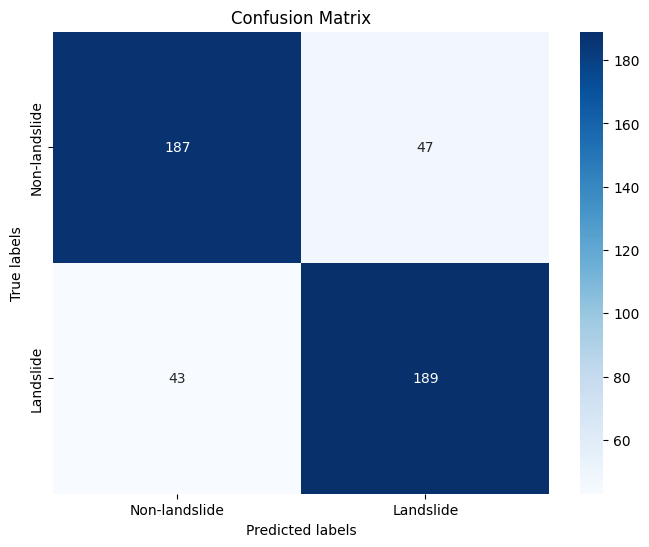

In [50]:
conf_matrix = confusion_matrix(y_val, y_pred_val)  # Ensure the order of y_test and y_pred

# Creating a heatmap
plt.figure(figsize=(8, 6))  # You can adjust the size of the figure
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-landslide', 'Landslide'],
            yticklabels=['Non-landslide', 'Landslide'])
plt.xlabel('Predicted labels')  # Label for x-axis
plt.ylabel('True labels')  # Label for y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.savefig('/mnt/q/Plots/Autosklearn_MLP_CM_EcternalVal.png') 
plt.show()

In [53]:
# Print the overall accuracy
print(accuracy_score(y_val, y_pred_val))

0.8068669527896996


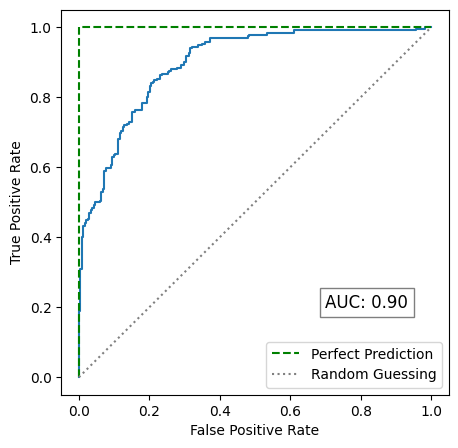

In [55]:
# ROC-AUC Curve
y_probs = cls_loaded.predict_proba(X_val)[:, 1]  # Get probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_val, y_probs, pos_label=positive_label)  # Compute ROC curve
auc_score = roc_auc_score(y_val, y_probs)  # Compute AUC score

# Plotting the ROC curve using the adjusted figure size to make the plot narrower
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust these values to make the plot narrower (width, height)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=ax)

# Adding text for AUC score and additional lines for reference
plt.text(0.7, 0.2, f'AUC: {auc_score:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.plot([0, 0, 1], [0, 1, 1], color='green', linestyle='--', label='Perfect Prediction')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', label='Random Guessing')

plt.legend(loc='lower right')

# Save the plot to a file with the adjusted figure size
plt.savefig('/mnt/q/Plots/Autosklearn_MLP_Roc_AxternalVal.png')
plt.show()